In [1]:
### Network Slicing Recognition

The telecom industry is going through a massive digital transformation with the adoption of ML, AI, feedback-based automation and advanced analytics to handle the next generation applications and services. AI concepts are not new; the algorithms used by Machine Learning and Deep Learning are being currently implemented in various industries and technology verticals. With growing data and immense volume <br>

of information over 5G, the ability to predict data proactively, swiftly and with accuracy, is critically important. Data-driven decision making will be vital in future communication networks due to the traffic explosion and Artificial Intelligence (AI) will accelerate the 5G network performance. <br>

Mobile operators are looking for a programmable solution that will allow them to accommodate multiple independent tenants on the same physical infrastructure and 5G networks allow for end-to-end network resource allocation using the concept of Network Slicing (NS). <br>

Network Slicing will play a vital role in enabling a multitude of 5G applications, use cases, and services. Network slicing functions will provide an end-to-end isolation between slices with an ability to customize each slice based on the service demands (bandwidth, coverage, security, latency, reliability, etc). <br>

Your Task is to build a Machine Learning model that will be able to to proactively detect and eliminate threats based on incoming connections thereby selecting the most appropriate network slice, even in case of a network failure. <br>

**LTE/5g** - User Equipment categories or classes to define the performance specifications <br>
**Packet Loss Rate** - number of packets not received divided by the total number of packets sent. <br>
**Packet Delay** - The time for a packet to be received. <br>
**Slice type** - network configuration that allows multiple networks (virtualized and independent) <br>
**GBR** - Guaranteed Bit Rate <br>
**Healthcare** - Usage in Healthcare (1 or 0) <br>
**Industry 4.0** - Usage in Digital Enterprises(1 or 0) <br>
**IoT Devices** - Usage <br>
**Public Safety** - Usage for public welfare and safety purposes (1 or 0) <br>
**Smart City & Home** - usage in daily household chores <br>
**Smart Transportation** - usage in public transportation <br>
**Smartphone** - whether used for smartphone cellular data <br>

In [2]:
###! pip install neattext

In [3]:
import pandas as pd
import numpy as np
import neattext.functions as nfx
import seaborn as sn

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [4]:
##! pip uninstall numpy
##!pip install numpy==1.20

In [5]:
##!mkdir ~/.kaggle

In [6]:
##!cp /kaggle.json ~/.kaggle/

In [7]:
###!chmod 600 ~/.kaggle/kaggle.json

In [8]:
##! pip install kaggle
##!pip install keras-tuner

In [9]:
##!kaggle datasets download -d gauravduttakiit/network-slicing-recognition

In [10]:
###!unzip /content/network-slicing-recognition.zip

In [11]:
train_dataset = pd.read_csv("/content/train_dataset.csv")
test_dataset = pd.read_csv("/content/test_dataset.csv")

In [12]:
print(train_dataset.shape, test_dataset.shape)

(31583, 17) (31584, 16)


In [13]:
test_dataset['slice Type'] = 0

In [14]:
train_dataset = train_dataset.reset_index()
test_dataset = test_dataset.reset_index()
train_dataset.rename(columns = { "index" : "ID"}, inplace = True)
test_dataset.rename(columns = { "index" : "ID"}, inplace = True)

In [15]:
train_dataset.columns

Index(['ID', 'LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay',
       'IoT', 'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone', 'slice Type'],
      dtype='object')

In [16]:
train_dataset['slice Type'].value_counts()

1    16799
3     7392
2     7392
Name: slice Type, dtype: int64

In [17]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

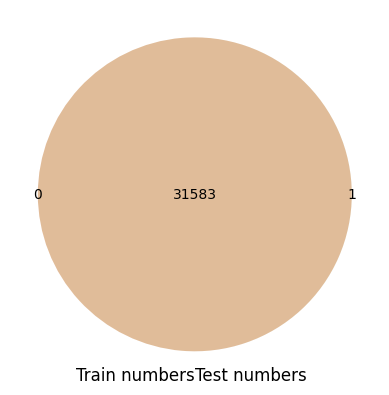

In [18]:
set_numbers_train = set(train_dataset[['ID']].drop_duplicates().sort_values(by = 'ID')['ID'].tolist())
set_numbers_test = set(test_dataset[['ID']].drop_duplicates().sort_values(by = 'ID')['ID'].tolist())
venn2((set_numbers_train, set_numbers_test), set_labels = ('Train numbers', 'Test numbers'))

In [19]:
train_dataset.columns

Index(['ID', 'LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay',
       'IoT', 'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone', 'slice Type'],
      dtype='object')

In [20]:
###! pip install klib

In [21]:
###!pip install keras-tuner

In [22]:
import klib

In [23]:
train_dataset = klib.clean_column_names(train_dataset)
test_dataset = klib.clean_column_names(test_dataset)

In [24]:
train_dataset = klib.convert_datatypes(train_dataset)
test_dataset = klib.convert_datatypes(test_dataset)

In [25]:
train_dataset.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

### Anomaly Detection Using One-Class SVM


In [26]:
from sklearn import svm

In [27]:
clf = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
clf.fit(train_dataset)

OneClassSVM(gamma=0.1, nu=0.05)

In [28]:
pred = clf.predict(train_dataset)

# inliers are labeled 1, outliers are labeled -1
normal = train_dataset[pred == 1]
abnormal = train_dataset[pred == -1]

In [29]:
print(normal.shape, abnormal.shape)

(18373, 18) (13210, 18)


In [30]:
normal.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [31]:
normal['slice_type'].value_counts()

1    9839
2    4294
3    4240
Name: slice_type, dtype: int64

In [32]:
train_dataset = normal

In [33]:
print(train_dataset.shape)
print(train_dataset.columns)

(18373, 18)
Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')


In [34]:
test_dataset['slice_type'] = 0

In [35]:
klib.cat_plot(train_dataset)

No columns with categorical data were detected.


In [36]:
klib.corr_interactive_plot(train_dataset)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='id', ylabel='Density'>

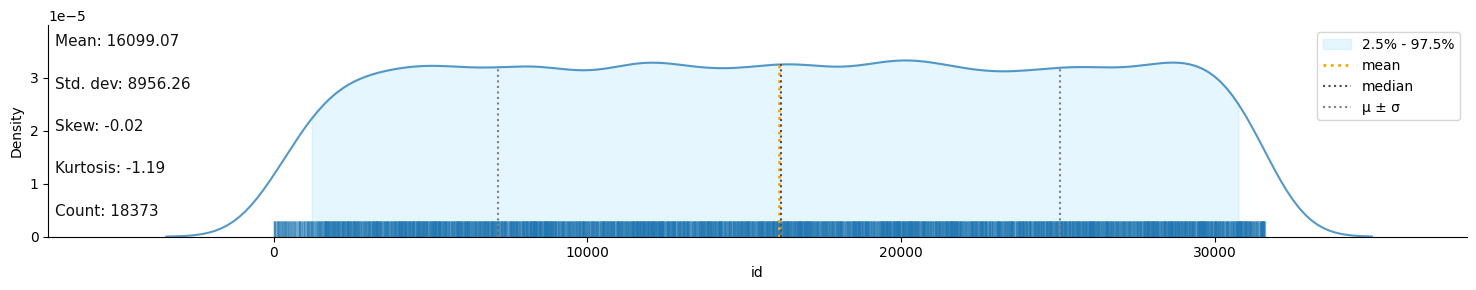

In [37]:
klib.dist_plot(train_dataset)

In [38]:
klib.missingval_plot(train_dataset)

No missing values found in the dataset.


In [39]:
klib.corr_mat(train_dataset)

,id,lte_5g_category,time,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone,slice_type
id,1.00,-0.02,-0.00,0.02,0.01,0.00,-0.00,0.00,-0.00,-0.01,-0.01,-0.01,0.00,0.00,0.01,-0.00,0.00,-0.00
lte_5g_category,-0.02,1.00,-0.01,0.02,-0.02,0.10,-0.10,-0.01,0.01,-0.03,0.02,0.05,0.02,0.02,0.05,0.02,-0.08,0.08
time,-0.00,-0.01,1.00,0.01,-0.01,0.00,-0.00,-0.01,0.01,-0.00,-0.01,0.00,-0.00,0.00,0.01,-0.00,0.00,-0.00
packet_loss_rate,0.02,0.02,0.01,1.00,0.31,0.17,-0.17,-0.02,0.02,-0.17,-0.17,-0.22,0.39,-0.18,0.58,-0.18,-0.07,-0.10
packet_delay,0.01,-0.02,-0.01,0.31,1.00,-0.19,0.19,0.42,-0.42,-0.13,-0.24,-0.28,0.44,-0.25,0.20,-0.24,0.27,-0.39
io_t,0.00,0.10,0.00,0.17,-0.19,1.00,-1.00,-0.12,0.12,-0.32,0.26,0.39,0.27,0.27,0.39,0.26,-0.81,0.91
lte_5g,-0.00,-0.10,-0.00,-0.17,0.19,-1.00,1.00,0.12,-0.12,0.32,-0.26,-0.39,-0.27,-0.27,-0.39,-0.26,0.81,-0.91
gbr,0.00,-0.01,-0.01,-0.02,0.42,-0.12,0.12,1.00,-1.00,0.04,-0.21,0.05,0.28,-0.22,0.04,-0.22,0.10,-0.32
non_gbr,-0.00,0.01,0.01,0.02,-0.42,0.12,-0.12,-1.00,1.00,-0.04,0.21,-0.05,-0.28,0.22,-0.04,0.22,-0.10,0.32
ar_vr_gaming,-0.01,-0.03,-0.00,-0.17,-0.13,-0.32,0.32,0.04,-0.04,1.00,-0.08,-0.12,-0.09,-0.09,-0.13,-0.08,-0.30,-0.29


In [40]:
train_dataset.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [41]:
# Checking for outliers in the continuous variables
num_train_dataset = train_dataset[['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type']]


In [42]:
train_dataset['slice_type'].value_counts()

1    9839
2    4294
3    4240
Name: slice_type, dtype: int64

In [43]:
y_train = train_dataset['slice_type']
x_train = train_dataset.drop('slice_type', axis = 1)
y_test = test_dataset['slice_type']
x_test = test_dataset.drop('slice_type', axis = 1)

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
extra_tree_forest.fit(x_train, y_train)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)

In [45]:
import matplotlib.pyplot as plt

In [46]:
feature_importance_normalized

array([1.00712917e-05, 0.00000000e+00, 2.16989276e-07, 1.29379654e-01,
       2.82803661e-02, 2.85846553e-01, 2.34843792e-01, 7.45860560e-02,
       5.65496310e-02, 6.04741052e-02, 3.06829805e-02, 4.32631343e-02,
       1.85732114e-02, 0.00000000e+00, 7.82075506e-02, 3.53963038e-02,
       1.71630025e-01])

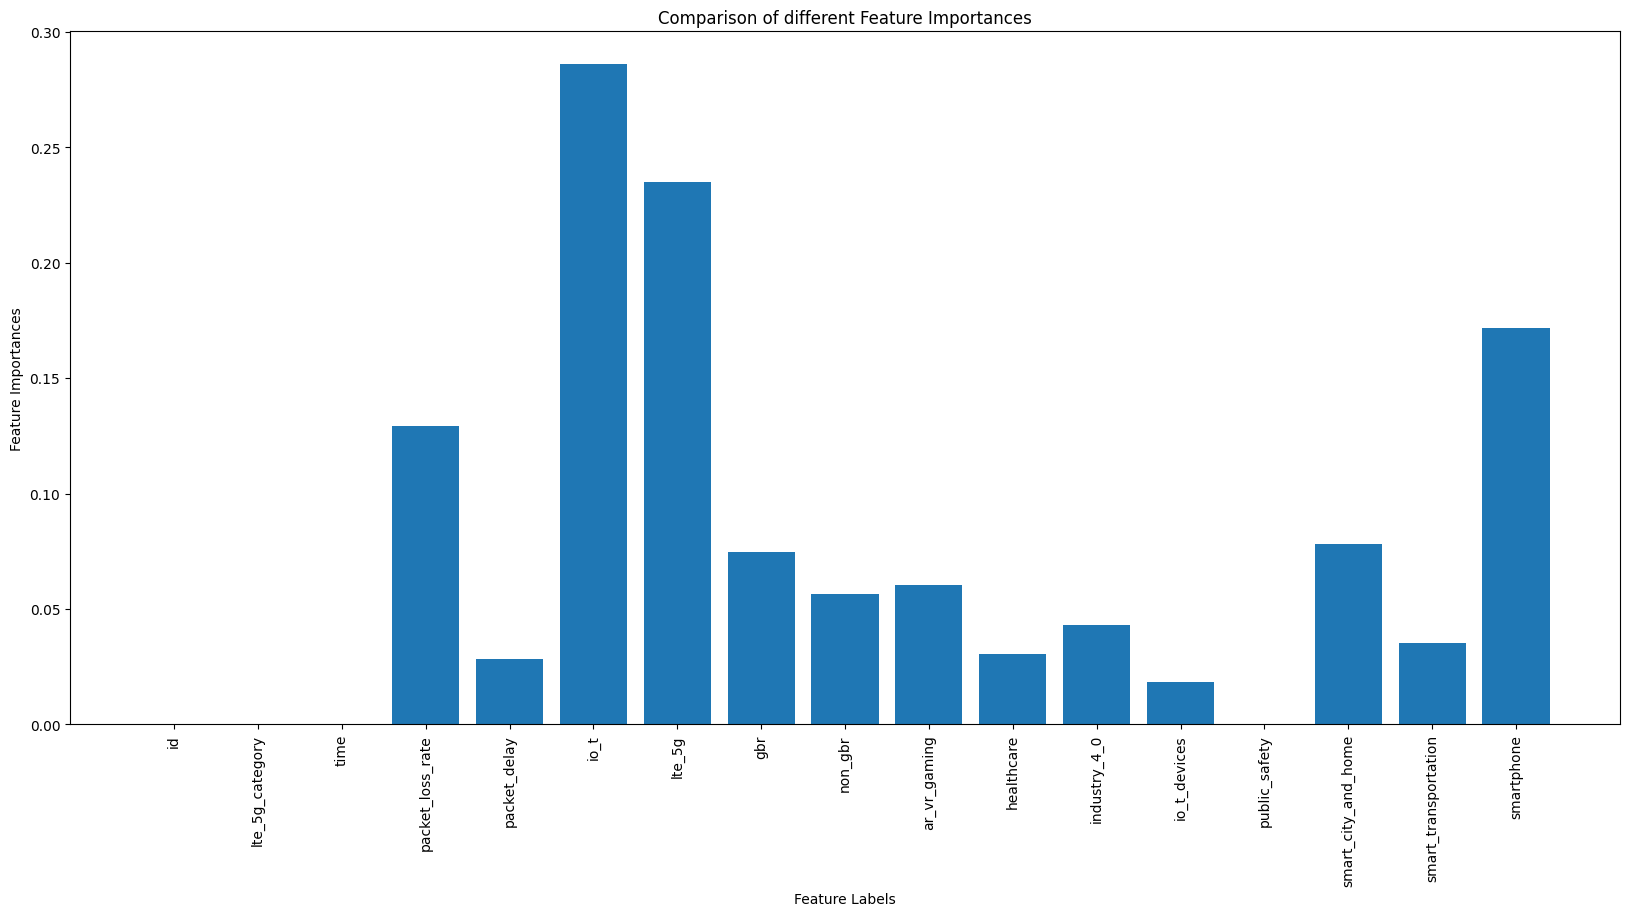

In [47]:
plt.figure(figsize = [20,9])
plt.bar(x_train.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.xticks(rotation = 90)
plt.title('Comparison of different Feature Importances')
plt.show()

In [48]:
x_train.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object')

In [49]:
x_train2 = x_train[['lte_5g_category', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone']]

In [50]:
x_test2 = x_test[['lte_5g_category', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone']]

In [51]:
print(x_train2.shape, x_test2.shape)

(18373, 15) (31584, 15)


In [52]:
y_train.value_counts()

1    9839
2    4294
3    4240
Name: slice_type, dtype: int64

In [53]:
x_train2 = pd.DataFrame(x_train2)
x_test2 = pd.DataFrame(x_test2)

### Pearson Correlation

In [54]:
x_train2.astype(float).corr()

,lte_5g_category,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone
lte_5g_category,1.000000,0.022254,-0.015085,0.095605,-0.095605,-0.007156,0.007156,-0.034010,0.018408,0.045106,0.019458,0.019485,0.047347,0.019787,-0.075152
packet_loss_rate,0.022254,1.000000,0.306436,0.170858,-0.170858,-0.022315,0.022315,-0.168172,-0.174050,-0.216202,0.389878,-0.182358,0.578743,-0.176111,-0.067416
packet_delay,-0.015085,0.306436,1.000000,-0.187910,0.187910,0.424124,-0.424124,-0.127614,-0.238384,-0.284384,0.437355,-0.249763,0.200818,-0.241206,0.268831
io_t,0.095605,0.170858,-0.187910,1.000000,-1.000000,-0.122402,0.122402,-0.321284,0.260863,0.385515,0.265817,0.273314,0.394585,0.263951,-0.807524
lte_5g,-0.095605,-0.170858,0.187910,-1.000000,1.000000,0.122402,-0.122402,0.321284,-0.260863,-0.385515,-0.265817,-0.273314,-0.394585,-0.263951,0.807524
gbr,-0.007156,-0.022315,0.424124,-0.122402,0.122402,1.000000,-1.000000,0.037476,-0.213782,0.045353,0.281337,-0.223986,0.035940,-0.216313,0.099995
non_gbr,0.007156,0.022315,-0.424124,0.122402,-0.122402,-1.000000,1.000000,-0.037476,0.213782,-0.045353,-0.281337,0.223986,-0.035940,0.216313,-0.099995
ar_vr_gaming,-0.034010,-0.168172,-0.127614,-0.321284,0.321284,0.037476,-0.037476,1.000000,-0.083811,-0.123860,-0.085403,-0.087812,-0.126774,-0.084803,-0.299119
healthcare,0.018408,-0.174050,-0.238384,0.260863,-0.260863,-0.213782,0.213782,-0.083811,1.000000,-0.087228,-0.060145,-0.061841,-0.089280,-0.059722,-0.210653
industry_4_0,0.045106,-0.216202,-0.284384,0.385515,-0.385515,0.045353,-0.045353,-0.123860,-0.087228,1.000000,-0.088885,-0.091391,-0.131942,-0.088261,-0.311313


In [55]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset.columns)
    print(dataset.shape)

In [56]:
correlation(x_train2, 0.95)

Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object')
(18373, 15)


In [57]:
print("The Testing Data :", x_test2.columns)
print("The Training Data :", x_train2.columns)

The Testing Data : Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object')
The Training Data : Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object')


In [58]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [59]:
print(y_test.columns, y_train.columns)

Index(['slice_type'], dtype='object') Index(['slice_type'], dtype='object')


### PYCARET  AUTOML

In [60]:
###!pip install pycaret

In [61]:
###! pip install jinja2

In [62]:
###! pip install markupsafe==2.0.1

In [63]:
import pycaret

In [64]:
from pycaret.classification import *

In [65]:
print(train_dataset.shape, test_dataset.shape)

(18373, 18) (31584, 18)


In [66]:
train_dataset.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [67]:
train_dataset2 = train_dataset[['lte_5g_category', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type']]

In [68]:
test_dataset2 = test_dataset[['lte_5g_category', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type']]

In [69]:
x_test2.columns

Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object')

In [70]:
model= setup(data= train_dataset2, target= 'slice_type')

,Description,Value
0,Session id,906
1,Target,slice_type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(18373, 16)"
5,Transformed data shape,"(18373, 16)"
6,Transformed train set shape,"(12861, 16)"
7,Transformed test set shape,"(5512, 16)"
8,Numeric features,15
9,Preprocess,True


In [71]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9510
knn,K Neighbors Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1240
nb,Naive Bayes,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0350
dt,Decision Tree Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0490
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0350
rf,Random Forest Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2860
ada,Ada Boost Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2580
gbc,Gradient Boosting Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.3470
et,Extra Trees Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3230
xgboost,Extreme Gradient Boosting,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2480


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=906, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
logisticreg= create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [73]:
pred_holdout = predict_model(logisticreg, data= x_test2)

In [74]:
pred_holdout

,lte_5g_category,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone,prediction_label,prediction_score
0,15,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1,0.9988
1,14,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,0.9999
2,11,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,2,0.9992
3,20,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,2,0.9992
4,2,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0,1,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31579,9,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,0.9998
31580,20,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0,3,1.0000
31581,8,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0,3,0.9993
31582,13,0.010000,75,0,1,0,1,0,0,0,0,0,0,0,1,1,0.9999


In [75]:
pred_holdout.columns

Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'prediction_label',
       'prediction_score'],
      dtype='object')

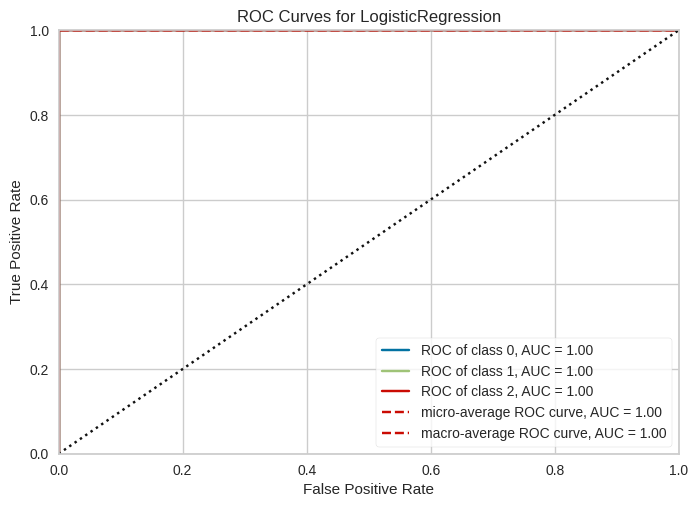

In [76]:
# AUC-ROC plot
plot_model(logisticreg, plot = 'auc')

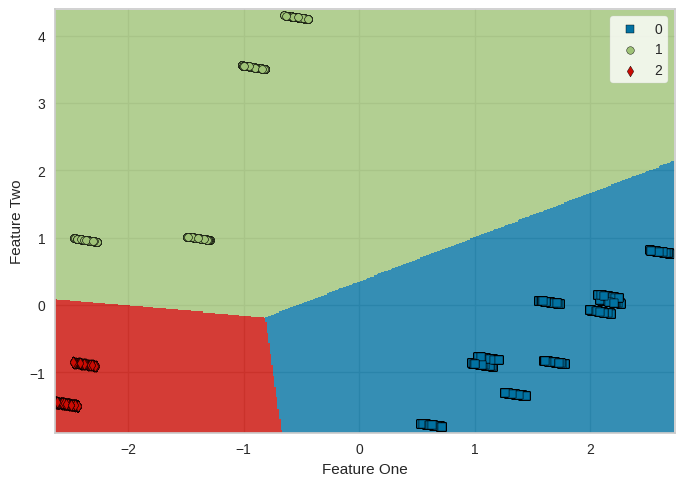

In [77]:
# Decision Boundary
plot_model(logisticreg, plot = 'boundary')

In [78]:
##! pip install shap

In [79]:
import shap

### Logistic Regression

In [80]:
tune_logisticreg = tune_model(logisticreg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [81]:
print(tune_logisticreg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=906, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


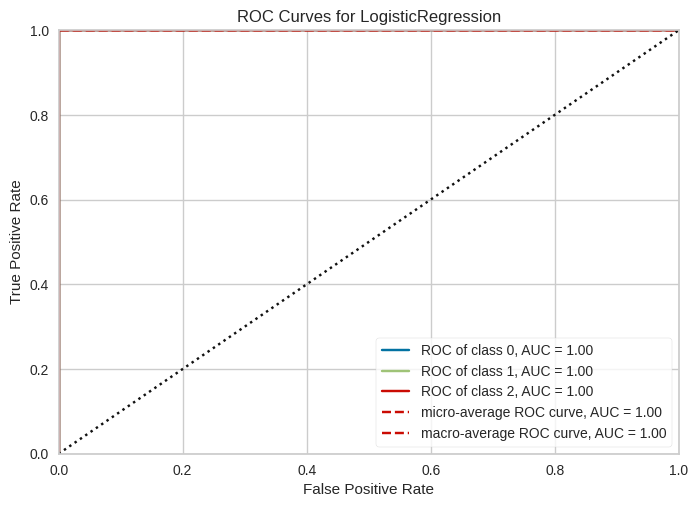

In [82]:
plot_model(tune_logisticreg)

In [83]:
predict_model(tune_logisticreg)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,lte_5g_category,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone,slice_type,prediction_label,prediction_score
23556,13,0.001000,100,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0.9994
4680,4,0.010000,300,1,0,1,0,0,0,0,0,0,1,0,0,2,2,0.9997
3904,8,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0.9989
20321,18,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2,0.9990
4096,4,0.010000,75,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29236,17,0.010000,75,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0.9999
7150,16,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0.9988
10559,11,0.000001,300,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0.9992
9212,11,0.000001,60,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0.9995


In [84]:
final_logisticreg = finalize_model(tune_logisticreg)
print(final_logisticreg)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['lte_5g_category',
                                             'packet_loss_rate', 'packet_delay',
                                             'io_t', 'lte_5g', 'gbr', 'non_gbr',
                                             'ar_vr_gaming', 'healthcare',
                                             'industry_4_0', 'io_t_devices...
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                         

In [85]:
print(x_test2.columns, y_test.shape)
print(x_train2.shape, y_train.shape)

Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object') (31584, 1)
(18373, 15) (18373, 1)


In [88]:
final_logisticreg.fit(x_train2, y_train)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['lte_5g_category',
                                             'packet_loss_rate', 'packet_delay',
                                             'io_t', 'lte_5g', 'gbr', 'non_gbr',
                                             'ar_vr_gaming', 'healthcare',
                                             'industry_4_0', 'io_t_devices...
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('actual_estimator',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=906,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [89]:
y_pred = final_logisticreg.predict(x_test2)

In [92]:
y_pred = pd.DataFrame(y_pred)

In [94]:
y_pred.shape

(31584, 1)

In [95]:
test_data2 = pd.read_csv("/content/test_dataset.csv")

In [96]:
test_data2.shape

(31584, 16)

In [97]:
resultdetails = pd.concat([test_data2, y_pred], axis=1, join="inner")

In [98]:
resultdetails.shape

(31584, 17)

In [100]:
resultdetails['target'].value_counts()

1    16800
3     7392
2     7392
Name: target, dtype: int64

In [103]:
from sklearn.metrics import classification_report

In [104]:
y_pred.value_counts()

target
1         16800
2          7392
3          7392
dtype: int64

In [101]:
resultdetails.to_csv("/content/final.csv")